In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import os
import shutil
from geopy.distance import geodesic

In [2]:
stores_pd = pd.read_csv('real_distances/unique_stores.csv')
stores_pd['type'] = 'S'
drops_pd = pd.read_csv('real_distances/unique_drops.csv')
drops_pd['type'] = 'D'
info_pd = pd.concat([stores_pd, drops_pd])
info_pd

,Latitude,Longitude,type
0,22.745049,75.892471,S
1,12.913041,77.683237,S
2,12.914264,77.678400,S
3,11.003669,76.976494,S
4,12.972793,80.249982,S
...,...,...,...
4351,25.540377,81.924236,D
4352,23.308998,77.463573,D
4353,30.940184,75.879615,D
4354,30.982872,75.906808,D


In [4]:
X = info_pd[['Latitude', 'Longitude']].to_numpy()
dbscan = DBSCAN(eps=.1, min_samples=5)
labels = dbscan.fit_predict(X)

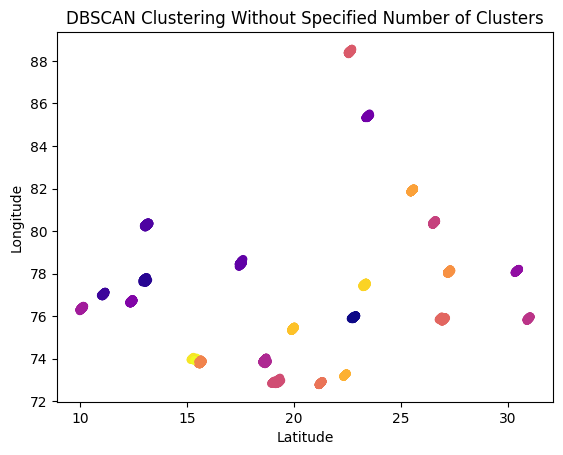

24
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}


In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', marker='o', edgecolor='none')
plt.title("DBSCAN Clustering Without Specified Number of Clusters")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()
print(len(set(labels)))
print(set(labels))

In [6]:
for i in set(labels):
    count = info_pd.iloc[labels == i]['type'].value_counts()
    demand, store = count['D'], count['S']
    print(f"Cluster #{i}: Demand {demand}. Stores: {store}")

Cluster #0: Demand 220. Stores: 20
Cluster #1: Demand 220. Stores: 20
Cluster #2: Demand 220. Stores: 20
Cluster #3: Demand 220. Stores: 20
Cluster #4: Demand 220. Stores: 20
Cluster #5: Demand 176. Stores: 16
Cluster #6: Demand 209. Stores: 19
Cluster #7: Demand 155. Stores: 13
Cluster #8: Demand 219. Stores: 20
Cluster #9: Demand 220. Stores: 20
Cluster #10: Demand 215. Stores: 18
Cluster #11: Demand 216. Stores: 18
Cluster #12: Demand 220. Stores: 20
Cluster #13: Demand 220. Stores: 20
Cluster #14: Demand 240. Stores: 20
Cluster #15: Demand 220. Stores: 20
Cluster #16: Demand 164. Stores: 15
Cluster #17: Demand 144. Stores: 12
Cluster #18: Demand 178. Stores: 15
Cluster #19: Demand 110. Stores: 10
Cluster #20: Demand 174. Stores: 16
Cluster #21: Demand 154. Stores: 14
Cluster #22: Demand 11. Stores: 1
Cluster #23: Demand 11. Stores: 1


In [41]:
shutil.rmtree('clusters')
os.mkdir('clusters')

for i in set(labels):
    folder_name = f'clusters/{i}'
    os.mkdir(folder_name)
    filtered = info_pd.iloc[labels == i]

    filtered_d = filtered[filtered['type'] == 'D']
    filtered_s = filtered[filtered['type'] == 'S']

    new_df_demand = filtered_d.reset_index()[['Latitude', 'Longitude']]
    new_df_stores = filtered_s.reset_index()[['Latitude', 'Longitude']]

    new_df_demand.to_csv(f'{folder_name}/demand.csv')
    new_df_stores.to_csv(f'{folder_name}/stores.csv')


In [15]:
def calculate_distance(row):
    store_coords = (row['Store_Latitude'], row['Store_Longitude'])
    drop_coords = (row['Drop_Latitude'], row['Drop_Longitude'])
    # Calculate the distance in kilometers
    return geodesic(store_coords, drop_coords).kilometers

In [16]:
for i in set(labels):
    print(f"Label {i}")   
    folder_name = f'clusters/{i}'

    drops_file = f'{folder_name}/demand.csv'  # Replace with your drops file path
    drops_df = pd.read_csv(drops_file)

    # Initialize an empty DataFrame to store distances
    distance_matrix = pd.DataFrame(index=drops_df.index, columns=drops_df.index)
    count = 0
    # Calculate distances between drop locations
    for i, drop_1 in drops_df.iterrows():
        for j, drop_2 in drops_df.iterrows():
            drop_1_coords = (drop_1['Latitude'], drop_1['Longitude'])
            drop_2_coords = (drop_2['Latitude'], drop_2['Longitude'])
            # Calculate geodesic distance
            distance_matrix.loc[i, j] = geodesic(drop_1_coords, drop_2_coords).kilometers

            count += 1
            if count % 50000 == 0:
                print(f"iteration number {count}")

    # Add labels to rows and columns
    distance_matrix.index = [f"Drop_{idx}" for idx in drops_df.index]
    distance_matrix.columns = [f"Drop_{idx}" for idx in drops_df.index]

    # Save the distance matrix to a CSV file
    distance_matrix.to_csv(f'{folder_name}/demand_distance.csv', index=True)

    print(f"Drop-to-drop {i} distance matrix saved to 'drop_distance_matrix.csv'.")

Label 0
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 1
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 2
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 3
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 4
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 5
Drop-to-drop 175 distance matrix saved to 'drop_distance_matrix.csv'.
Label 6
Drop-to-drop 208 distance matrix saved to 'drop_distance_matrix.csv'.
Label 7
Drop-to-drop 154 distance matrix saved to 'drop_distance_matrix.csv'.
Label 8
Drop-to-drop 218 distance matrix saved to 'drop_distance_matrix.csv'.
Label 9
Drop-to-drop 219 distance matrix saved to 'drop_distance_matrix.csv'.
Label 10


KeyboardInterrupt: 

In [53]:
for i in set(labels):
    print(f"Label {i}")   
    folder_name = f'clusters/{i}'

    file_drops = f'{folder_name}/demand.csv'
    file_stores = f'{folder_name}/stores.csv'

    df_drops = pd.read_csv(file_drops)
    df_stores = pd.read_csv(file_stores)

    distance_matrix = pd.DataFrame(index=df_stores.index, columns=df_drops.index)
    count = 0
    for drop_idx, drop_row in df_drops.iterrows():
        for store_idx, store_row in df_stores.iterrows():
            store_coords = (store_row['Latitude'], store_row['Longitude'])
            drop_coords = (drop_row['Latitude'], drop_row['Longitude'])
            distance = geodesic(store_coords, drop_coords).kilometers
            distance_matrix.loc[store_idx, drop_idx] = distance

            count += 1
            if count % 50000 == 0:
                print(f"iteration number {count}")

    # Add labels to rows and columns
    distance_matrix.index = [f"Store_{i}" for i in df_stores.index]
    distance_matrix.columns = [f"Drop_{j}" for j in df_drops.index]

    # Save the distance matrix to a CSV file
    distance_matrix.to_csv(f'{folder_name}/store_demand_distance.csv', index=True)

    print("Distance matrix saved to 'distance_matrix.csv'.")

    existing_matrix_file = f'{folder_name}/store_demand_distance.csv'  # Replace with your file path
    distance_matrix = pd.read_csv(existing_matrix_file, index_col=0)  # Load with the first column as index

    # Transpose the matrix to flip rows and columns
    flipped_matrix = distance_matrix.T

    # Save the transposed matrix to a new CSV file
    flipped_matrix.to_csv(f'{folder_name}/demand_store_distance.csv', index=True)

    print("Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.")

Label 0
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 1
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 2
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 3
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 4
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 5
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 6
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distance matrix saved to 'drop_to_store_distance_matrix.csv'.
Label 7
Distance matrix saved to 'distance_matrix.csv'.
Drop-to-store distan

# Testing!

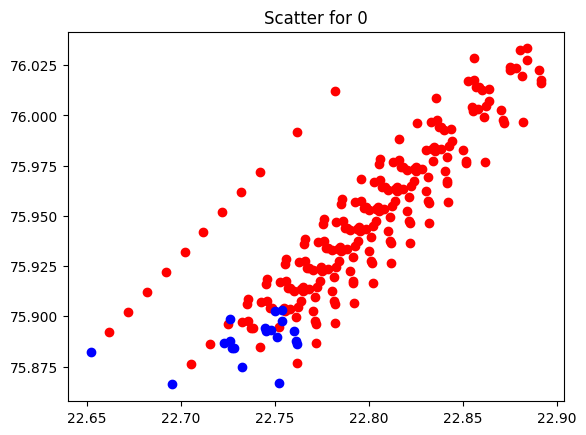

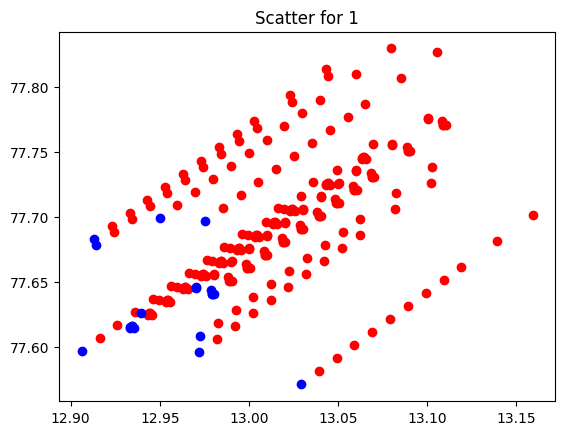

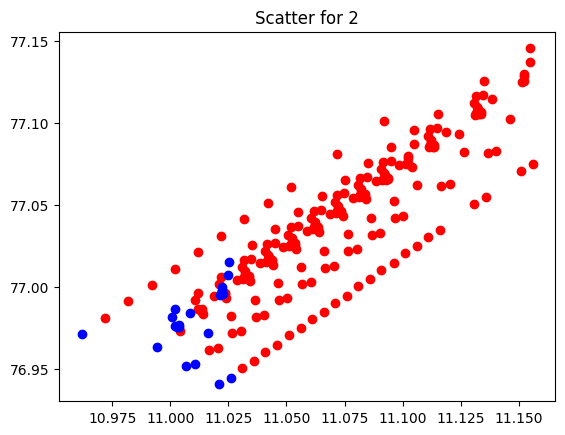

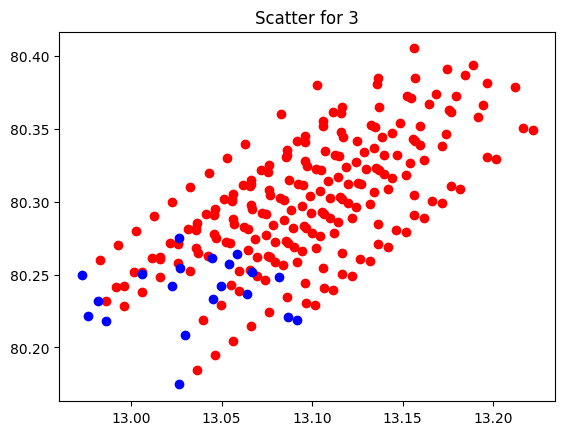

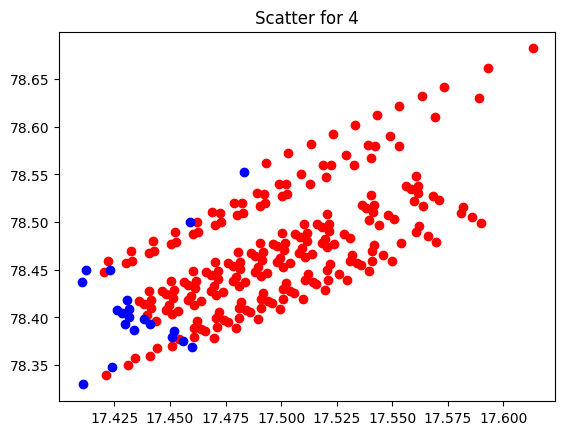

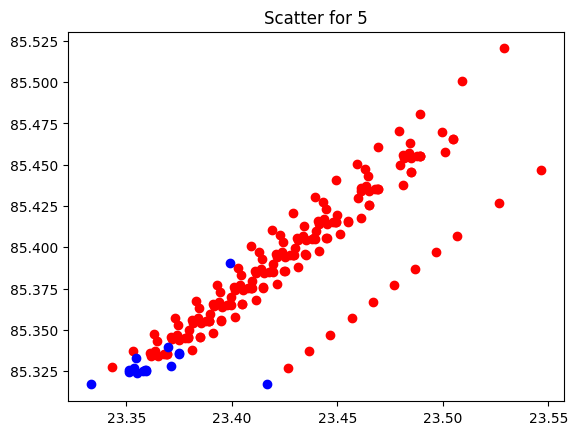

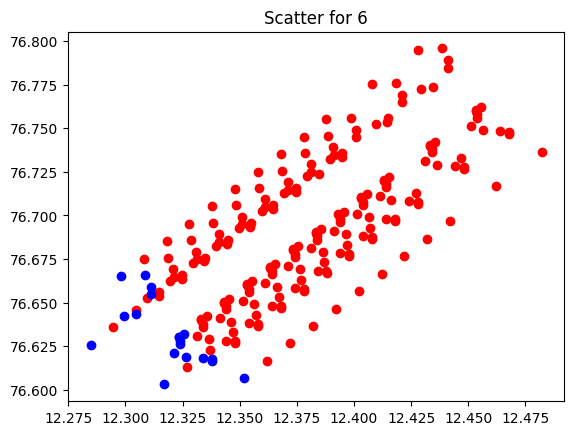

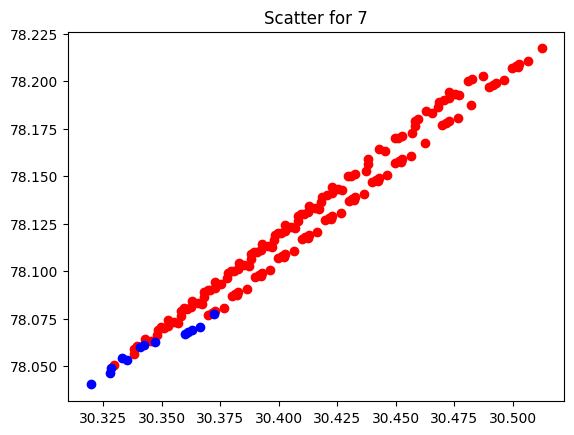

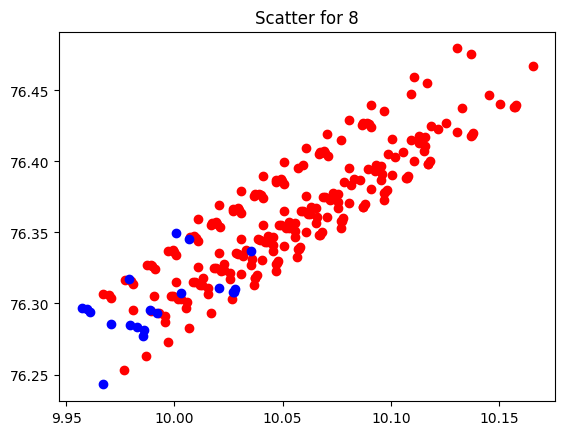

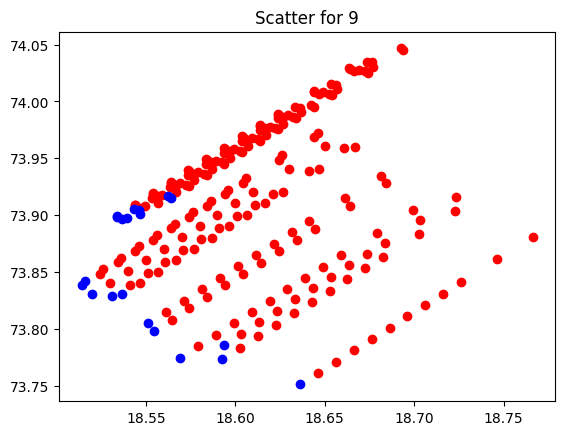

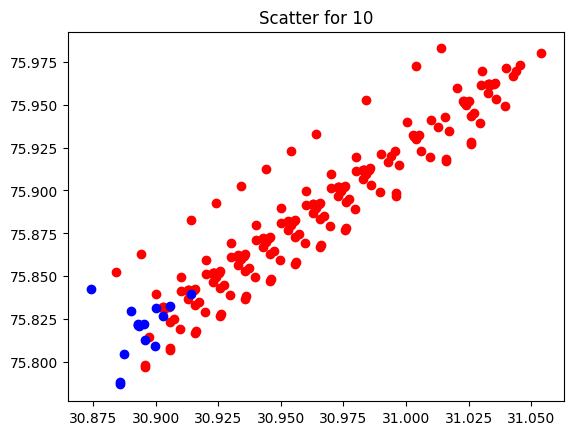

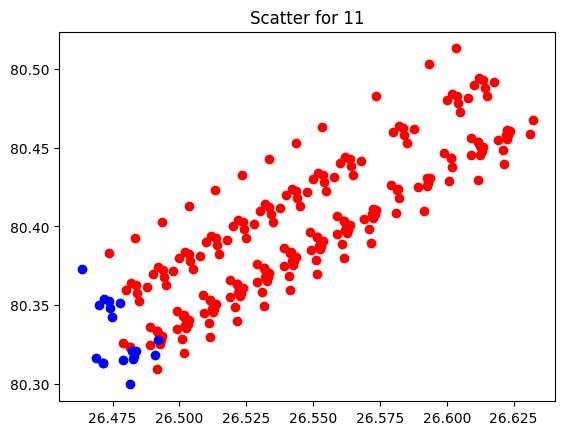

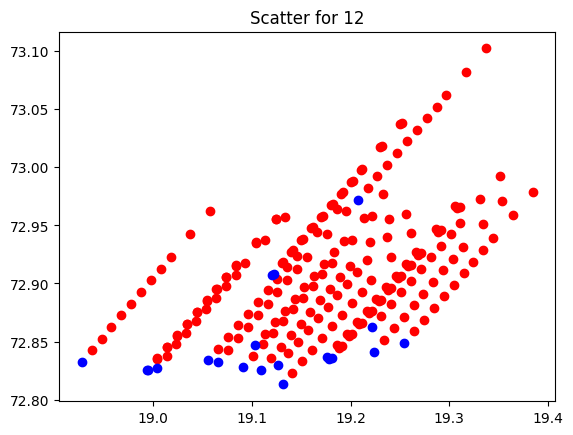

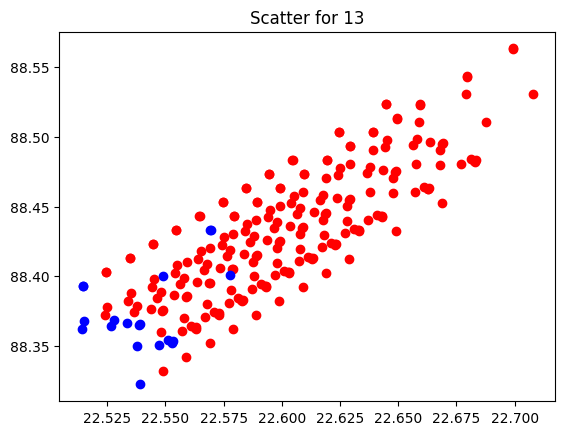

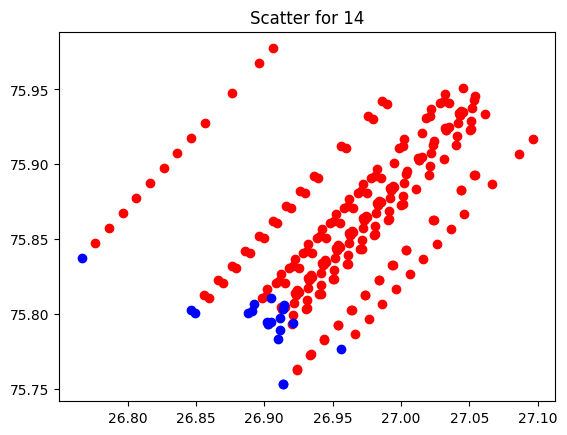

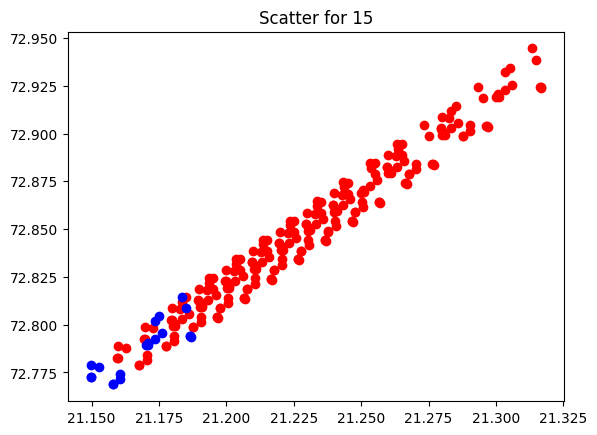

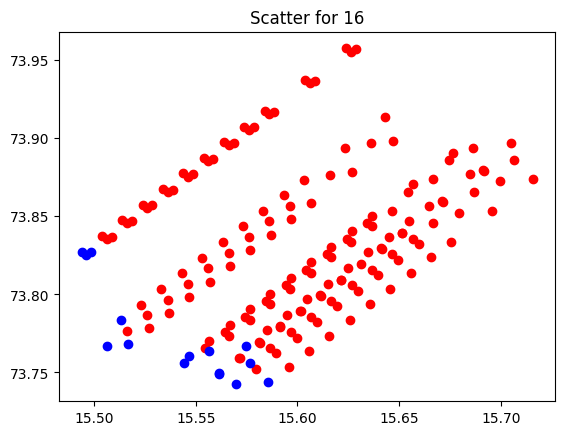

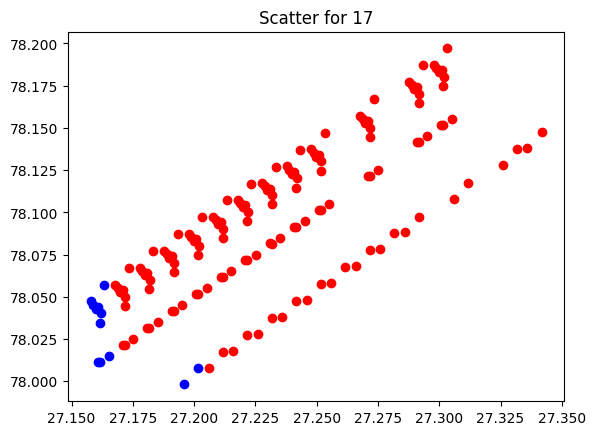

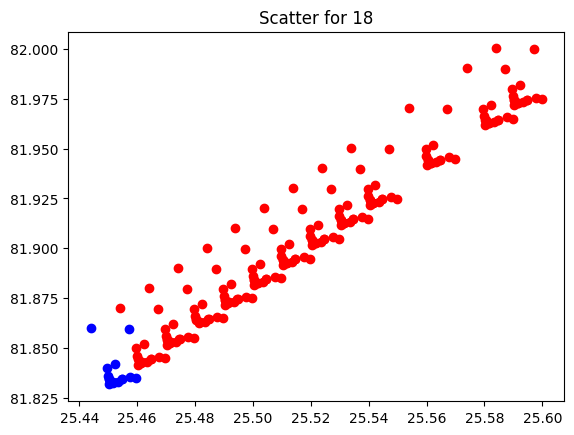

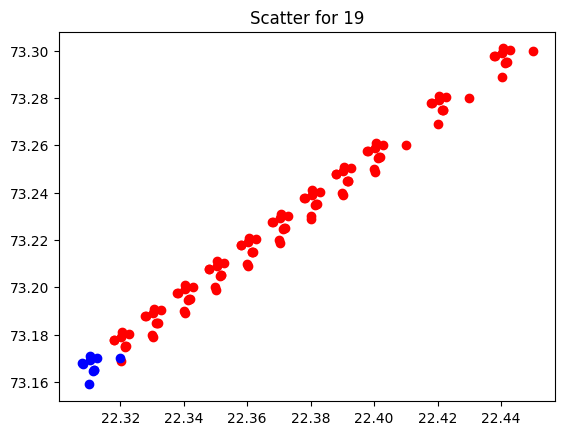

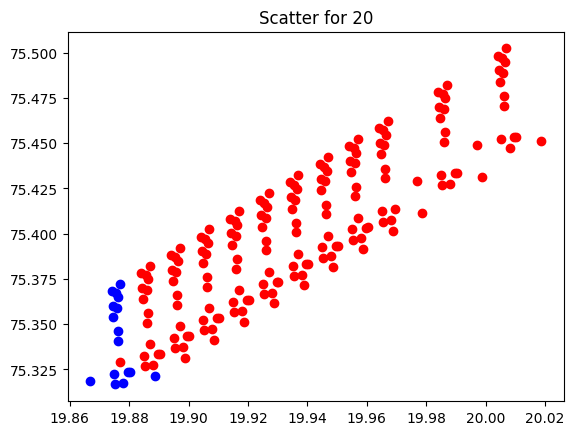

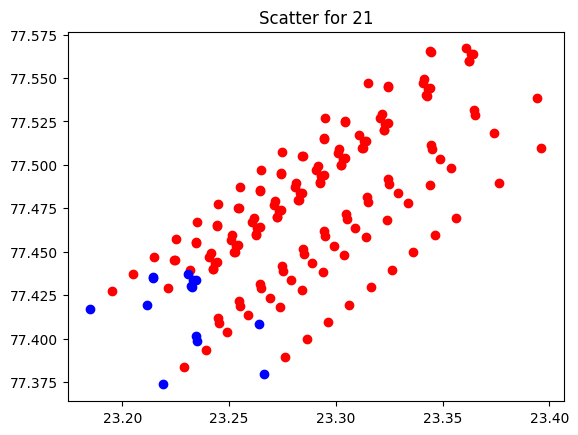

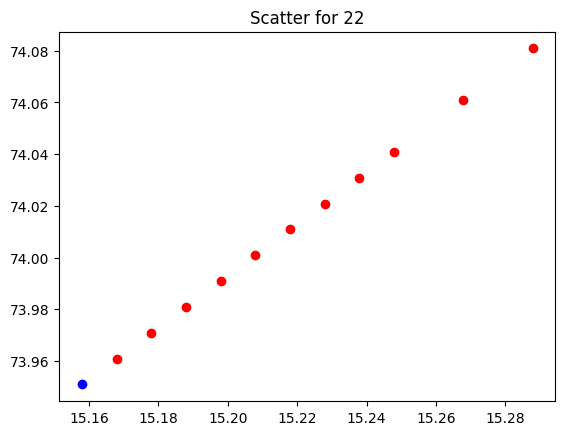

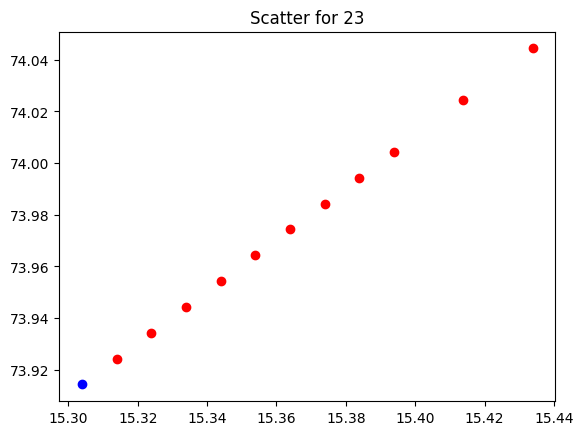

In [42]:
for i in set(labels):
    plt.clf()
    folder_name = f'clusters/{i}'
    demand = pd.read_csv(f'{folder_name}/demand.csv')
    stores = pd.read_csv(f'{folder_name}/stores.csv')

    plt.scatter(demand['Latitude'], demand['Longitude'], color = 'red')
    plt.scatter(stores['Latitude'], stores['Longitude'], color = 'blue')
    
    plt.title(f"Scatter for {i}")
    plt.show()

